In [1]:
import re
import time

import requests
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

OK!
ITSA4.SA 376
9.14


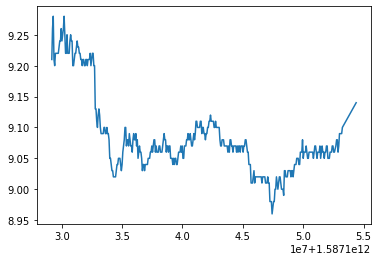

In [2]:
base = 'http://cotacoes.economia.uol.com.br/ws/asset'
assets = base + '/stock/list?size=10000000'
intraday = base + '/{asset}/intraday?size=400&callback=uolfinancecallback0'
assets = {i['code']: i['idt'] for i in requests.get(assets).json()['data'] if "ITSA4" in i['code']}


print("OK!")


def get_intraday(asset):
    url = intraday.format(**{'asset': asset})
    return json.loads(requests.get(url).content[20:-2])


if __name__ == '__main__':
    for asset, code in assets.items():
        print(asset, code)
        
        quote = get_intraday(code).get('data', {})
        
        quote = sorted(quote, key=lambda x: x["date"])
        
        x = []
        values = []
        
        for line in quote:
            x.append(line["date"])
            values.append(line["price"])
        
        plt.plot(x, values)
        
        print(values[-1])

In [5]:
def get_actual_stock_price_b3_status_invest(stock): 
    stock_type = ""
    
    if stock[-1] in ["3", "4", "5"]:
        stock_type = "acoes"
    elif stock[-2:] == "11":
        stock_type = "fundos-imobiliarios"
    else:
        raise ValueError("Not was possible recognize the type the stock use those one:\n\t- 3 = Ordinárias\n\t- 4 = Preferenciais\n\t- 4 = Preferenciais classes A\n\t- 4 = Preferenciais classes B\n\t- 11 = Fundos")
    
    
    request = requests.get(f"https://statusinvest.com.br/{stock_type}/{stock}")
    regex_filter = '<div title="Valor atual do ativo">[\t|\r|\n|.]*<h3 class="title m-0">Valor atual<\/h3>[\t|\r|\n|.]*<span class="icon">(.*)<\/span>[\t|\r|\n|.]*<strong class="value">(.*)<\/strong>[\t|\r|\n|.]*<\/div>'
    
    search_result = re.search(regex_filter, request.text)
    
    
    if search_result != None:
        return search_result.groups()
    else:
        raise ValueError(f"Invalid stock={stock}")

In [6]:
print(get_actual_stock_price_b3_status_invest("bcff11"))

('R$', '83,70')


In [7]:
def get_yahoo_finance_stock(stock, start, end, date_format="%Y-%m-%d", interval="daily", events="history"):
    interval = str(interval).lower()
    
    if interval == "daily":
        interval = "1d"
    elif interval == "weekly":
        interval = "1wk"
    elif interval == "monthly":
        interval = "1mo"
    else:
        raise ValueError(f"Invalid parameter for interval={interval}\nPlease use one of these intervals:\n\t1 - daily\n\t2 - weekly\n\t3 - monthly")
        
    
    events = str(events).lower()
    
    if not events in ["history", "div", "split"]:
        raise ValueError(f"Invalid parameter for events={events}\nPlease use one of these events:\n\t1 - history (Historical prices)\n\t2 - div (Dividends only)\n\t3 - split (Stock split)")
    
    
    start_timestamp = int(time.mktime(time.strptime(start, date_format)))
    end_timestamp = int(time.mktime(time.strptime(end, date_format))) + (60 * 60 * 24)
    

    return pd.read_csv(f"https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={start_timestamp}&period2={end_timestamp}&interval={interval}&events={events}")

In [8]:
get_yahoo_finance_stock("ITSA4.SA", "2020-03-11", "2020-03-20", interval="daily", events="history")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,10.89,11.00,9.87,10.40,10.40,45533600
1,2020-03-12,9.25,9.85,9.07,9.27,9.27,52155000
2,2020-03-13,10.50,10.56,9.27,10.20,10.20,58134100
3,2020-03-16,9.15,9.79,9.10,9.10,9.10,51916900
4,2020-03-17,9.36,9.91,9.07,9.54,9.54,59804500
5,2020-03-18,8.95,9.30,8.56,9.07,9.07,57136100
6,2020-03-19,8.80,9.09,8.31,8.76,8.76,62315800
7,2020-03-20,9.08,9.16,8.28,8.31,8.31,54438100


In [9]:
get_yahoo_finance_stock("ABEV3.SA", "2020-03-11", "2020-03-20", interval="daily", events="history")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,14.14,14.33,12.90,13.75,13.75,39788900
1,2020-03-12,12.48,12.68,11.39,11.58,11.58,36313400
2,2020-03-13,12.60,13.09,11.64,12.70,12.70,51339000
3,2020-03-16,11.39,11.77,10.43,11.03,11.03,52067300
4,2020-03-17,11.05,11.91,11.05,11.69,11.69,70142000
5,2020-03-18,10.73,11.21,10.55,11.19,11.19,62802600
6,2020-03-19,10.82,12.16,10.36,11.70,11.70,53157300
7,2020-03-20,11.90,12.49,11.76,12.05,12.05,49887100


In [10]:
get_yahoo_finance_stock("MGLU3.SA", "2020-03-11", "2020-03-20", interval="daily", events="history")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,45.000000,46.770000,39.900002,43.080002,42.895481,20082900
1,2020-03-12,36.000000,38.830002,30.570000,34.000000,33.854370,17509200
2,2020-03-13,42.500000,42.759998,34.209999,42.000000,41.820107,30140700
3,2020-03-16,35.000000,39.910000,34.070000,34.070000,33.924072,23096200
4,2020-03-17,36.119999,37.680000,32.849998,35.570000,35.417648,27054900
5,2020-03-18,32.020000,33.619999,26.469999,28.809999,28.686602,30437100
6,2020-03-19,27.500000,31.370001,25.000000,30.549999,30.419147,28180800
7,2020-03-20,32.799999,36.070000,30.650000,30.650000,30.518721,28366800


In [11]:
get_yahoo_finance_stock("BCFF11.SA", "2020-03-11", "2020-03-20", interval="daily", events="history")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,78.910004,78.910004,78.910004,78.910004,78.910004,0
1,2020-03-12,78.910004,78.910004,78.910004,78.910004,78.910004,0
2,2020-03-13,78.910004,78.910004,78.910004,78.910004,78.910004,0
3,2020-03-16,78.910004,78.910004,78.910004,78.910004,78.910004,0
4,2020-03-17,78.910004,78.910004,78.910004,78.910004,78.910004,0
5,2020-03-18,78.910004,78.910004,78.910004,78.910004,78.910004,0
6,2020-03-19,78.910004,78.910004,78.910004,78.910004,78.910004,0
7,2020-03-20,78.910004,78.910004,78.910004,78.910004,78.910004,0


In [12]:
get_yahoo_finance_stock("XPML11.SA", "2020-03-11", "2020-03-20", interval="daily", events="history")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,122.300003,122.459999,117.610001,119.300003,119.300003,117470.0
1,2020-03-12,114.980003,114.980003,102.500000,106.000000,106.000000,195700.0
2,2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-16,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-18,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-03-20,NaN,NaN,NaN,NaN,NaN,NaN
